# Training and Implementing CNN in Keras

## Loading Dataset

In [ ]:
from keras.datasets import mnist
#download mnist data and split into train and test setsg
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Testing the loaded Data

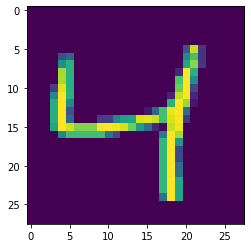

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[2])

## Checking Shape

X_train.shape

In [ ]:
  #check image shape
X_train[0].shape

(28, 28)

In [ ]:
print (type(X_train))

<class 'numpy.ndarray'>


## Data pre-processing
Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

## to One-hot rep


In [ ]:
print (y_train[2])

4


In [ ]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print (y_train[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


##Building the model


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

##Compiling the model


In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model


In [ ]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7993 - accuracy: 0.9198 - val_loss: 0.0933 - val_accuracy: 0.9719


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred =  ((y_pred).argmax(axis=1))
y_true = (y_test.argmax(axis=1))

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_true,y_pred,output_dict=True)

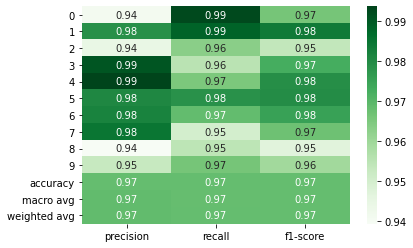

In [ ]:
import seaborn as sns
import pandas as pd
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, cmap="Greens",annot=True)